In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
import sys
sys.path.append('../')
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572

In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(1)

In [6]:
x_test.shape

(1, 572, 572, 1)

In [7]:
y_test.shape

(1, 572, 572, 2)

In [8]:
y_test.dtype

dtype('float64')

In [12]:
print(y_test)

[[[[ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]
   ..., 
   [ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]]

  [[ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]
   ..., 
   [ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]]

  [[ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]
   ..., 
   [ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]]

  ..., 
  [[ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]
   ..., 
   [ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]]

  [[ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]
   ..., 
   [ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]]

  [[ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]
   ..., 
   [ 1.  0.]
   [ 1.  0.]
   [ 1.  0.]]]]


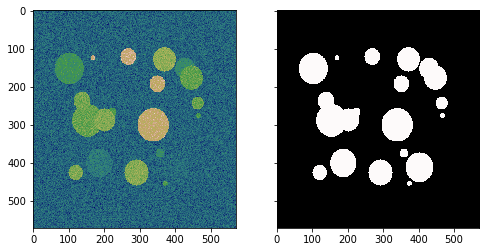

In [9]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [9]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2017-10-15 15:14:19,355 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [10]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [11]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2017-10-15 15:14:25,920 Removing '/data/repo/tf_unet/demo/prediction'
2017-10-15 15:14:25,921 Removing '/data/repo/tf_unet/demo/unet_trained'
2017-10-15 15:14:25,947 Allocating '/data/repo/tf_unet/demo/prediction'
2017-10-15 15:14:25,948 Allocating '/data/repo/tf_unet/demo/unet_trained'
2017-10-15 15:14:26,968 Start optimization
2017-10-15 15:14:29,785 Iter 0, Minibatch Loss= 0.6348, Training Accuracy= 0.8794, Minibatch error= 12.1%
2017-10-15 15:14:30,396 Iter 2, Minibatch Loss= 0.5484, Training Accuracy= 0.8818, Minibatch error= 11.8%
2017-10-15 15:14:31,006 Iter 4, Minibatch Loss= 0.5500, Training Accuracy= 0.8018, Minibatch error= 19.8%
2017-10-15 15:14:31,660 Iter 6, Minibatch Loss= 0.4801, Training Accuracy= 0.8470, Minibatch error= 15.3%
2017-10-15 15:14:32,311 Iter 8, Minibatch Loss= 0.4920, Training Accuracy= 0.8129, Minibatch error= 18.7%
2017-10-15 15:14:32,990 Iter 10, Minibatch Loss= 0.4303, Training Accuracy= 0.8490, Minibatch error= 15.1%
2017-10-15 15:14:33,588 Iter 12,

2017-10-15 15:15:12,106 Epoch 6, Average loss: 0.1718, learning rate: 0.1470
2017-10-15 15:15:13,138 Iter 140, Minibatch Loss= 0.0337, Training Accuracy= 0.9896, Minibatch error= 1.0%
2017-10-15 15:15:13,823 Iter 142, Minibatch Loss= 0.0232, Training Accuracy= 0.9929, Minibatch error= 0.7%
2017-10-15 15:15:14,401 Iter 144, Minibatch Loss= 0.1591, Training Accuracy= 0.9600, Minibatch error= 4.0%
2017-10-15 15:15:14,933 Iter 146, Minibatch Loss= 0.0904, Training Accuracy= 0.9643, Minibatch error= 3.6%
2017-10-15 15:15:15,542 Iter 148, Minibatch Loss= 0.1840, Training Accuracy= 0.9477, Minibatch error= 5.2%
2017-10-15 15:15:16,077 Iter 150, Minibatch Loss= 0.1044, Training Accuracy= 0.9708, Minibatch error= 2.9%
2017-10-15 15:15:16,573 Iter 152, Minibatch Loss= 1.3572, Training Accuracy= 0.8542, Minibatch error= 14.6%
2017-10-15 15:15:17,071 Iter 154, Minibatch Loss= 0.3212, Training Accuracy= 0.8794, Minibatch error= 12.1%
2017-10-15 15:15:17,586 Iter 156, Minibatch Loss= 0.2188, Trainin

In [12]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-10-15 15:16:29,139 Restoring parameters from ./unet_trained/model.cpkt
2017-10-15 15:16:29,454 Model restored from file: ./unet_trained/model.cpkt


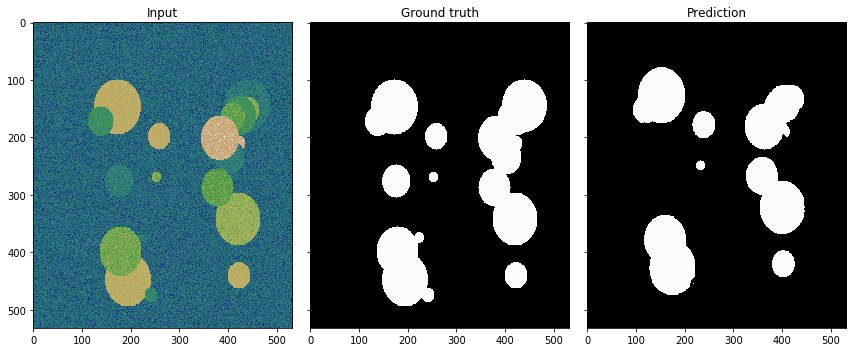

In [13]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")